<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Financial Data Preprocessing </h2> </html>

____________________________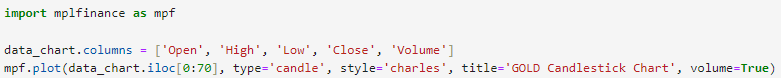

<html> <h4 style="color:blue;"> To speed up writing the code in the following few cells that plot graphs, you can copy and then slightly modify the code from the previous cells. </h4> </html>


_________________________________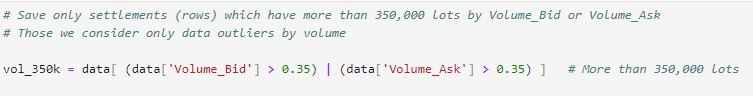

<html> <h4 style="color:blue;"> To speed up writing the code in the following few cells that plot graphs, you can copy and then slightly modify the code from the previous cells. </h4> </html>

_____________________________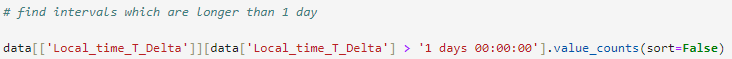

Note:
A typical mistake when choosing a part of the data and time for scaling is to scale the entire dataset before it is divided into test and training data. It is a mistake because scaling starts the calculation of statistics, that is, minima/maxima of variables. When realizing time series forecasting in real life, at the time of their generation, you cannot have information from future observations. Therefore, statistics should be calculated on the training data, and then the result obtained will be applied to the test data. To take information “from the future” to generate predictions (that is, from a test sample), the model will produce forecasts with “system bias

In [ ]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta

In [ ]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta

# Lab Logbook Requirement:

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_2022_Ask = pd.read_csv("XAUUSD_1 Min_Ask_2022.01.01_2022.12.31.csv")
df_2022_Bid = pd.read_csv("XAUUSD_1 Min_Bid_2022.01.01_2022.12.31.csv")

In [3]:
df_2022 = df_2022_Bid.merge(df_2022_Ask, left_on='Time (UTC)', right_on = 'Time (UTC)', how='outer')


In [4]:
df_2022

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2022.01.02 23:00:00,1828.604,1829.628,1828.544,1829.504,0.02635,1829.656,1830.936,1829.386,1830.196,0.02454
1,2022.01.02 23:01:00,1829.504,1830.104,1829.398,1830.004,0.01939,1829.936,1830.676,1829.916,1830.632,0.02697
2,2022.01.02 23:02:00,1830.098,1830.604,1829.998,1830.534,0.03017,1830.612,1831.226,1830.516,1831.146,0.04489
3,2022.01.02 23:03:00,1830.534,1830.704,1830.504,1830.674,0.00540,1831.156,1831.306,1831.046,1831.046,0.01846
4,2022.01.02 23:04:00,1830.674,1830.674,1830.448,1830.508,0.01806,1831.026,1831.181,1830.886,1831.086,0.02912
...,...,...,...,...,...,...,...,...,...,...,...
354689,2022.12.30 21:54:00,1824.248,1824.348,1824.148,1824.248,0.00532,1824.852,1825.052,1824.752,1824.852,0.00382
354690,2022.12.30 21:55:00,1824.148,1824.148,1823.737,1823.948,0.00597,1824.752,1824.752,1824.552,1824.552,0.00316
354691,2022.12.30 21:56:00,1823.948,1824.090,1823.347,1823.848,0.00837,1824.505,1824.675,1824.252,1824.452,0.00782
354692,2022.12.30 21:57:00,1823.748,1823.748,1823.023,1823.025,0.01078,1824.452,1824.452,1823.852,1823.852,0.00405


In [5]:
df_2022.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [6]:
file_obj2 = open('df_2022_1.csv', 'w')
df_2022.to_csv('df_2022_1.csv', encoding='utf-8', index=False)
file_obj2.close()

In [7]:
df_2022 = []
df_2022

[]

In [8]:
df = pd.read_csv('df_2022_1.csv', low_memory=False, sep=',')

In [11]:
df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()

df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]

In [12]:
data=df.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask'], axis=1)

In [13]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [14]:
data.shape

(354694, 14)

In [ ]:
import datetime

In [ ]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [15]:
data = data.drop(['Local time'], axis=1)

In [16]:
vol_350k = data[ (data['Volume_Bid'] > 0.35) | (data['Volume_Ask'] > 0.35)]

In [18]:
import cufflinks as cf
cf.go_offline()

In [19]:
Sid = 2436362
last_five_digits = 36362
last_three_digits = 362
sum_m = last_five_digits + 362

/Users/addicted/Desktop/venv/lib/python3.9/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



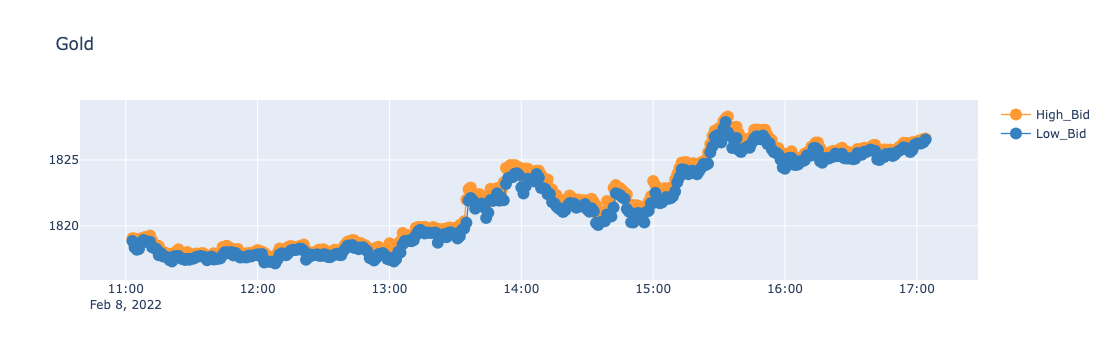

In [20]:
data.iloc[last_five_digits:sum_m,:][['High_Bid', 'Low_Bid', 'Local_time_T', 'Volume_Ask','Volume_Bid']].iplot(
                                                x='Local_time_T', y=['High_Bid', 'Low_Bid'], 
                                                mode='lines+markers', 
                                                xTitle='Date', yTitle='Price',
                                                layout=dict(
                            title='Gold',
                           
                            ))

<html> <h3 style="font-style:italic; color:blue;">
   
1) Plot the price chart of the part of the whole dataset 'High_Bid' and 'Low_Bid' prices using iplot() library.
2) The start point should equal the 5 last digits of your SID Number.
3) The time period (in minutes) should equal the 3 last digits of your SID Number.
4) Please only add a print-screen of the required code and final graph to your Lab Logbook.
</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK, AND UPLOAD THE LAB LOGBOOK REQUIREMENTS AS A SCREENSHOT OF YOUR CODE AND RESULT(S) ON YOUR GITHUB.
</h3> </html>